In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
twentyeleven = pd.read_csv('twentyeleven.csv')
twentyeleven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


<Axes: xlabel='date', ylabel='Quantity'>

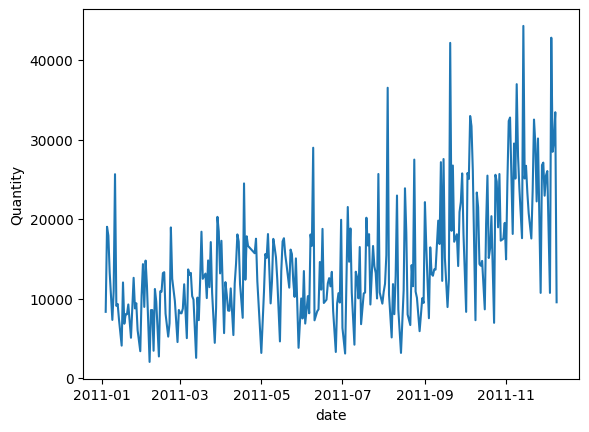

In [3]:
# Process data to get the quantity sold by date
twentyeleven['date'] = pd.to_datetime(twentyeleven['date'])
df = twentyeleven[(twentyeleven['Country'] == 'United Kingdom') & (twentyeleven['year'] == 2011)]
df = df.groupby(by = df['date'])[['Quantity']].sum()

# Plot the data
sns.lineplot(data = df, x = 'date', y = 'Quantity')

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

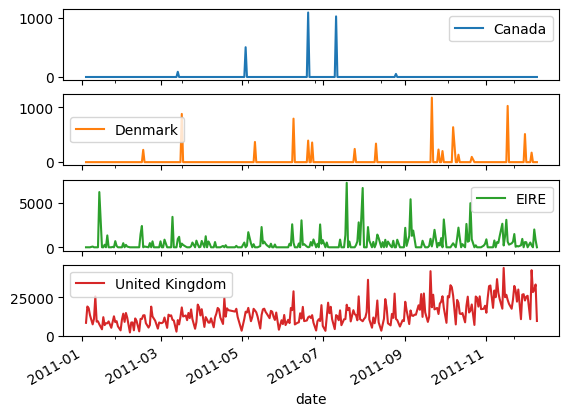

In [4]:
# Process data to get the sales qty by date and country
df = twentyeleven[
        (twentyeleven['Country'].isin(['Canada','Denmark','EIRE','United Kingdom'])) & 
        (twentyeleven['year'] == 2011)]
df_grouped = df.groupby(by=['Country', 'date']).agg(daily_sales=('Quantity', 'sum')).reset_index()
df_grouped_pivoted = df_grouped.pivot_table(values = 'daily_sales', columns = 'Country', index = 'date', fill_value=0)

# Plot the data
df_grouped_pivoted.plot(subplots = True)

In [5]:
# Import data
cars = pd.read_csv('cars.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      428 non-null    object 
 1   sports_car                428 non-null    bool   
 2   suv                       428 non-null    bool   
 3   wagon                     428 non-null    bool   
 4   minivan                   428 non-null    bool   
 5   pickup                    428 non-null    bool   
 6   all_wheel                 428 non-null    bool   
 7   rear_wheel                428 non-null    bool   
 8   Price                     428 non-null    int64  
 9   Dealer_Cost               428 non-null    int64  
 10  Engine_size               428 non-null    float64
 11  cylenders                 428 non-null    int64  
 12  horsepower                428 non-null    int64  
 13  city_miles_per_galloon    414 non-null    float64
 14  highway_mi

<Axes: xlabel='Price', ylabel='horsepower'>

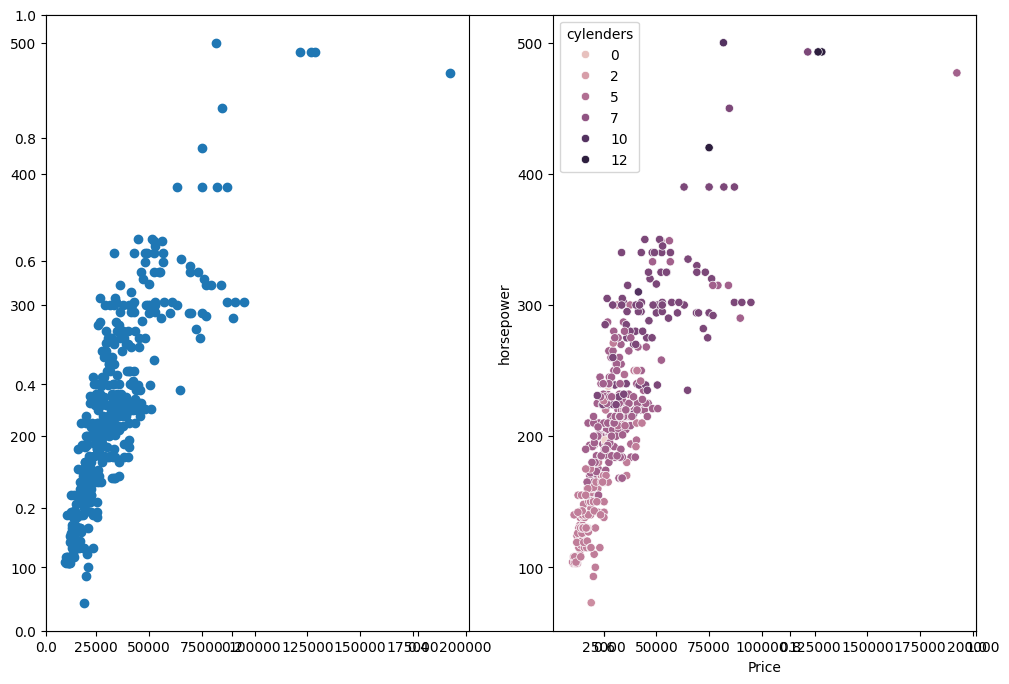

In [6]:
# Plot the relationship between price and horsepower
plt.subplots(figsize=(12, 8))

plt.subplot(1,2,1)
plt.scatter(x = cars['Price'], y = cars['horsepower'])

plt.subplot(1,2,2)
sns.scatterplot(x = cars['Price'], y = cars['horsepower'], hue = cars['cylenders'])

<Axes: xlabel='cylenders', ylabel='horsepower'>

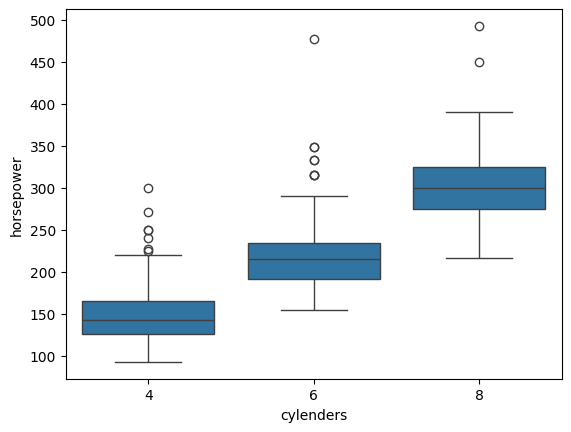

In [7]:
# Plot the box plot of the horsepower of each type of cyclenders
cars_new = cars[cars['cylenders'].isin([4,6,8])]
sns.boxplot(data = cars_new, x = 'cylenders', y = 'horsepower')

In [8]:
# Import data
iris = pd.read_csv('iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='sepal_length', ylabel='Density'>

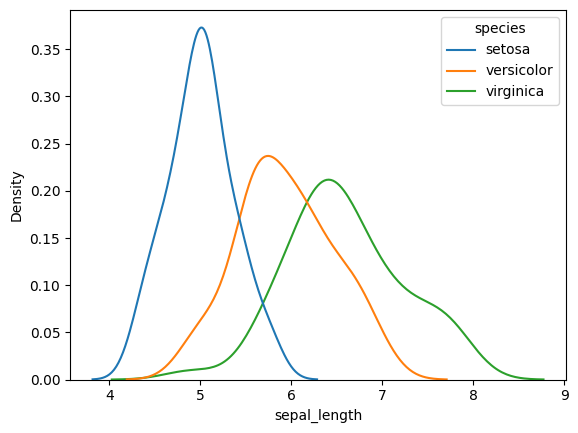

In [9]:
# Plot the histogram of sepal length for each species
sns.kdeplot(data = iris, x = 'sepal_length', hue = 'species')

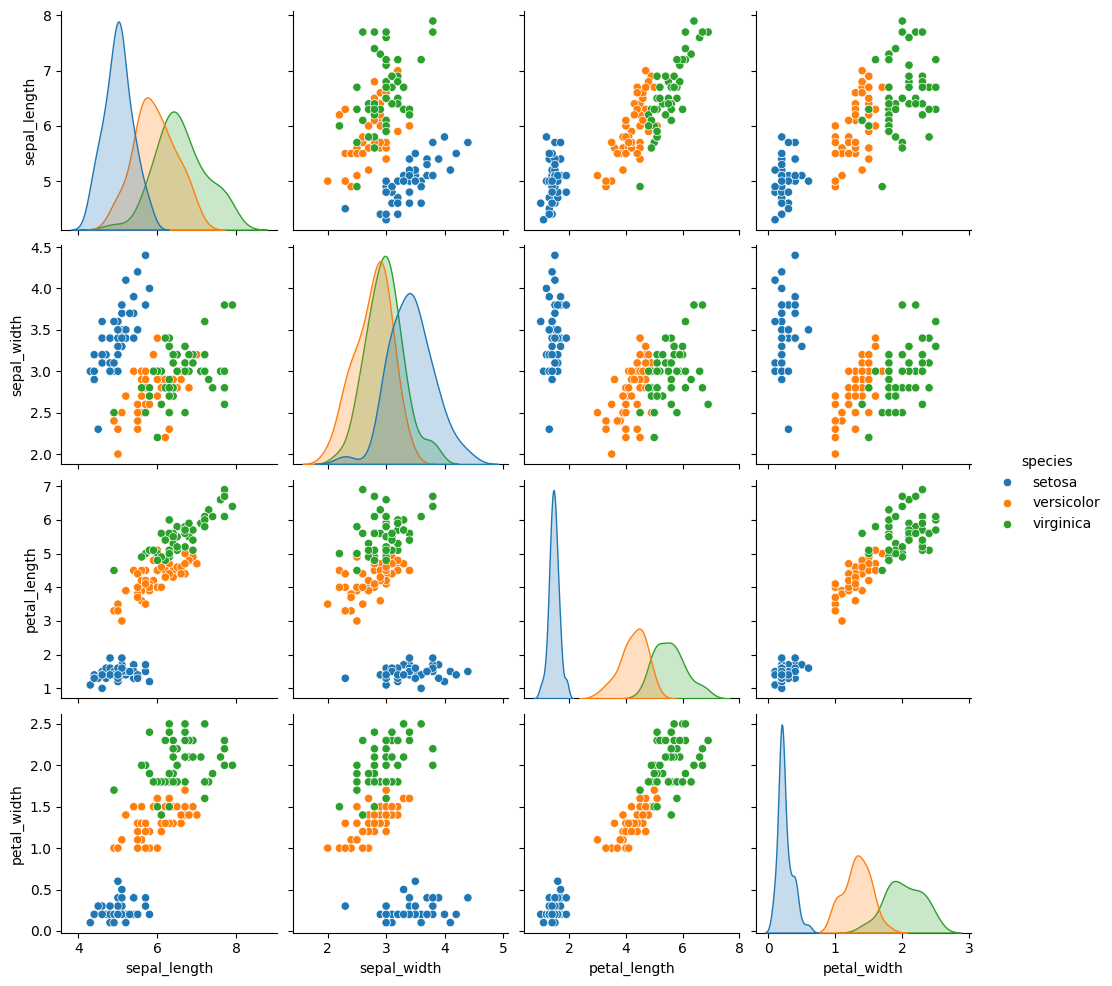

In [10]:
sns.pairplot(data = iris, hue = 'species')